In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-03-26 20:17:27.937342: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 20:17:28.919844: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 20:17:28.933152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 20:17:33.570072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
data = pd.read_csv('data/GOOG.csv').set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-04,28.343512,28.767174,28.319103,28.347746,28.347746,112897588
2014-02-05,28.477758,28.661818,28.095192,28.473274,28.473274,96139007
2014-02-06,28.670786,28.895693,28.581619,28.890711,28.890711,78155853
2014-02-07,29.081743,29.337536,28.905655,29.326078,29.326078,105843245
2014-02-10,29.185604,29.449615,29.116365,29.213751,29.213751,78099643


In [29]:
data = pd.read_csv('data/GOOG.csv').set_index('Date')
data = data[: 10]
data.shape
data['Open'] = data['Open'].round()
ovo  = data.rolling(window= 3).max()
print(ovo)

            Open       High        Low      Close  Adj Close       Volume
Date                                                                     
2014-02-04   NaN        NaN        NaN        NaN        NaN          NaN
2014-02-05   NaN        NaN        NaN        NaN        NaN          NaN
2014-02-06  29.0  28.895693  28.581619  28.890711  28.890711  112897588.0
2014-02-07  29.0  29.337536  28.905655  29.326078  29.326078  105843245.0
2014-02-10  29.0  29.449615  29.116365  29.326078  29.326078  105843245.0
2014-02-11  29.0  29.685482  29.195818  29.643389  29.643389  105843245.0
2014-02-12  30.0  29.685482  29.424212  29.643389  29.643389   82339476.0
2014-02-13  30.0  29.885483  29.424212  29.885483  29.885483   82339476.0
2014-02-14  30.0  29.997313  29.708645  29.957710  29.957710   87795852.0
2014-02-18  30.0  30.208521  29.887974  30.158957  30.158957   87795852.0


In [3]:
data['Log_Returns'] = np.log(data['Close']/ data['Close'].shift(1))
data['Realized_Volatility'] = data['Log_Returns'].rolling(window = 20).std()
data = data.dropna()

In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Realized_Volatility
Date,,,,,,,,
2024-01-29,153.639999,155.199997,152.919998,154.839996,154.839996,20909300,0.006804,0.010774
2024-01-30,154.009995,155.039993,152.774994,153.050003,153.050003,26578900,-0.011628,0.011272
2024-01-31,145.389999,145.589996,141.550003,141.800003,141.800003,43908600,-0.076347,0.021120
2024-02-01,143.690002,144.619995,142.259995,142.710007,142.710007,25526900,0.006397,0.021129
2024-02-02,140.889999,143.880005,138.169998,143.539993,143.539993,42116900,0.005799,0.020744


array([<AxesSubplot: xlabel='Date'>], dtype=object)

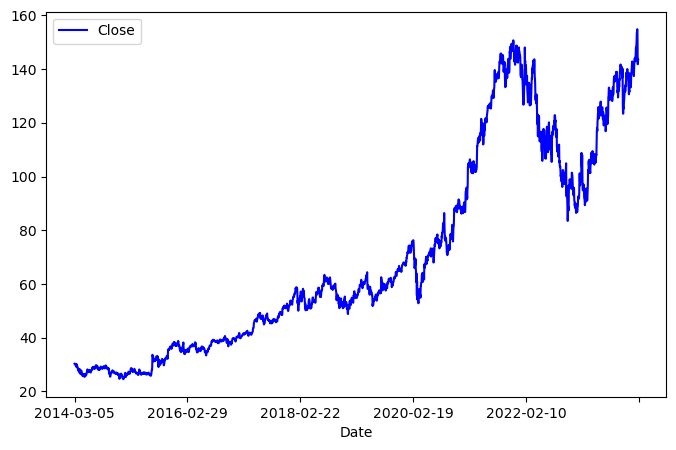

In [5]:
data[['Close']].plot(subplots= True, color = "blue",figsize=(8,5))

array([<AxesSubplot: xlabel='Date'>], dtype=object)

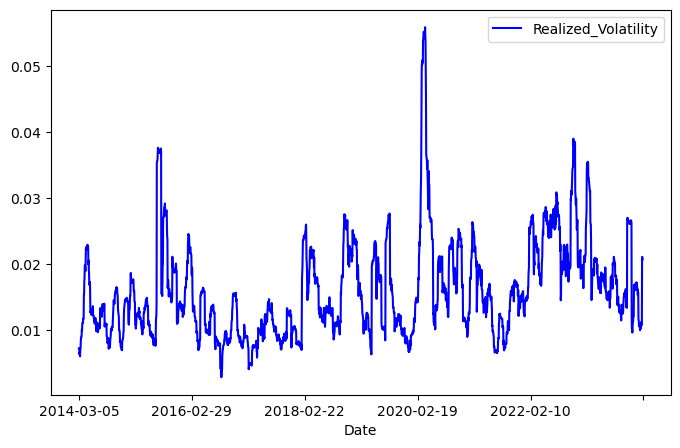

In [7]:
data[['Realized_Volatility']].plot(subplots=True, color="blue",figsize=(8,5))

Training/Test set

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test =train_test_split(data[['Log_Returns']],data['Realized_Volatility'],test_size=0.2,shuffle=False)

In [27]:
print(x_train.shape)
print(x_test.shape)

(1997, 1)
(500, 1)


In [30]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

RANDOM WALK


In [9]:
np.random.seed(50)
random_shocks = np.random.normal(0, data['Scaled_Volatility'], len(data))
print(random_shocks / 100)
data['Simulated_Volatility']= data['Scaled_Volatility'] + random_shocks/ 100

[-1.28807178e-03 -2.56495197e-05 -4.73681886e-04 ...  2.01914055e-03
  4.68093760e-03 -1.08176232e-03]


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Realized_Volatility,Scaled_Volatility,Simulated_Volatility
Date,,,,,,,,,,
2014-03-05,30.262817,30.462818,30.172157,30.342768,30.342768,49597208,0.002754,0.007290,0.082550,0.081262
2014-03-06,30.442892,30.539282,30.351236,30.376392,30.376392,50914126,0.001108,0.007303,0.082800,0.082775
2014-03-07,30.555471,30.560204,30.172905,30.256342,30.256342,60831159,-0.003960,0.006958,0.076286,0.075812
2014-03-10,30.278757,30.327326,29.989841,30.176142,30.176142,48766105,-0.002654,0.006362,0.065034,0.064082
2014-03-11,30.230936,30.244637,29.804285,29.887724,29.887724,68776830,-0.009604,0.006733,0.072039,0.073056


In [11]:
import matplotlib.pyplot as plt

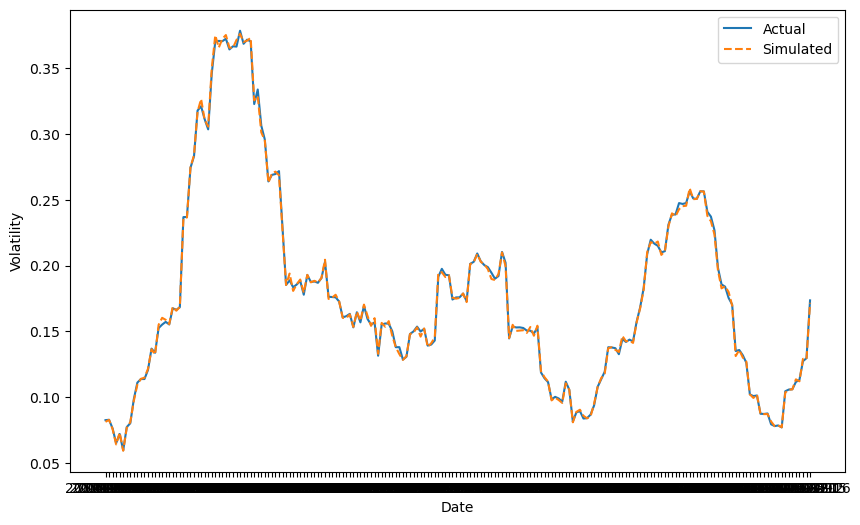

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data.index[:200],data['Scaled_Volatility'][:200],label= "Actual",linestyle = '-')
plt.plot(data.index[:200],data['Simulated_Volatility'][:200],label="Simulated",linestyle = '--')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
mse_actual = mean_squared_error(x_test,data['Simulated_Volatility'][-500:])
rmse = np.sqrt(mse_actual)

print(f"MSE : {mse_actual:.6f}")
print(f"RMSE : {rmse:.6f}")

MSE : 0.082947
RMSE : 0.288005


In [67]:
## TODO GARCH model 
import arch


SyntaxError: invalid syntax (3495482696.py, line 3)

In [50]:
basic_gm = arch.arch_model(x_train, p=1 , q= 1, mean = 'constant',vol = 'GARCH',dist='normal')
result = basic_gm.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6851480124332.372
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1351.267834603408
Iteration:      3,   Func. Count:     23,   Neg. LLF: -2654.5967734810565
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1469.1245119277473
Iteration:      5,   Func. Count:     36,   Neg. LLF: 817368.466331874
Iteration:      6,   Func. Count:     43,   Neg. LLF: -2806.368981835928
Iteration:      7,   Func. Count:     49,   Neg. LLF: -2615.1609320773823
Iteration:      8,   Func. Count:     56,   Neg. LLF: -2906.5319945323736
Iteration:      9,   Func. Count:     62,   Neg. LLF: -2906.6471090511577
Iteration:     10,   Func. Count:     67,   Neg. LLF: -2906.647247789971
Iteration:     11,   Func. Count:     71,   Neg. LLF: -2906.647247790799
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2906.647247789971
            Iterations: 11
            Function evaluations: 71
            Gradient eva

/home/korisnik/.local/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003788. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6289.88
Distribution:                  Normal   AIC:                           12587.8
Method:            Maximum Likelihood   BIC:                           12610.2
                                        No. Observations:                 1997
Date:                Wed, Feb 07 2024   Df Residuals:                     1996
Time:                        22:37:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            44.4708      0.134    332.250      0.000 [ 44.208, 44.733]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.3705      2.195      1.536      0.125   [ -0.932,  7.672]
alpha[1]       0.1457  7.199e-02      2.024  4.295e-02 [4.625e-03,  0.287]
beta[1]        0.7698      0.110      6.969  3.189e-12   [  0.553,  0.986]
==========================================================================

Covariance estimator: robust
"""

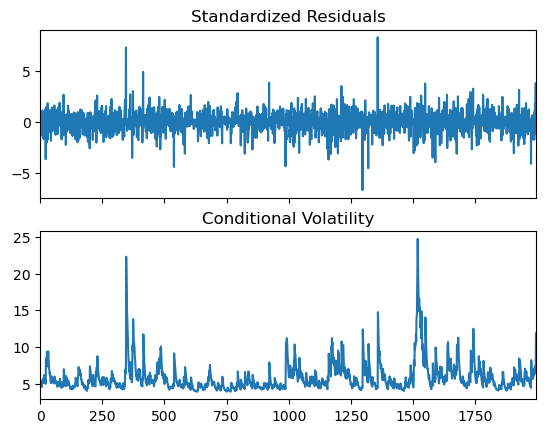

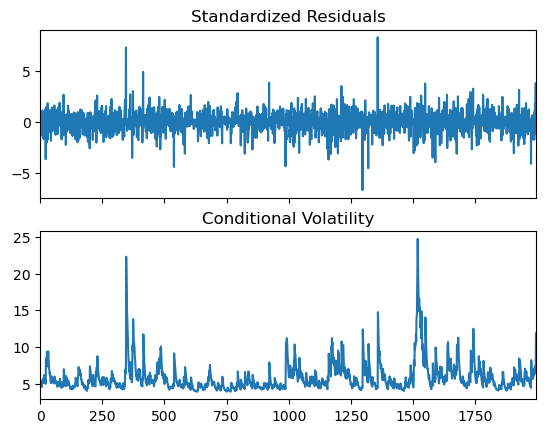

In [33]:
result.plot()

In [39]:
forecasted = result.conditional_volatility[-len(x_test):]
len(forecasted)

500

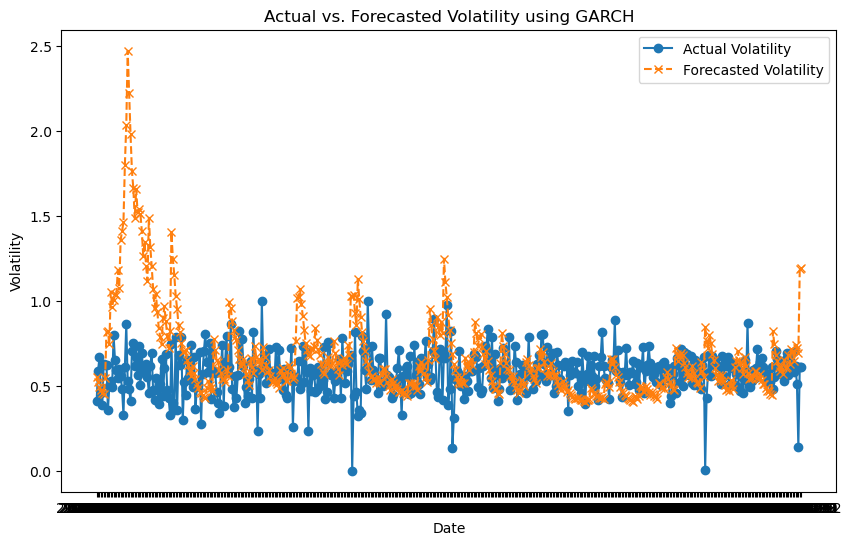

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[-500:], x_test, label='Actual Volatility', linestyle='-', marker='o')
plt.plot(data.index[-500:], forecasted/10, label='Forecasted Volatility', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.title('Actual vs. Forecasted Volatility using GARCH')
plt.show()

In [46]:
mse_actual = mean_squared_error(x_test,forecasted/10)
rmse = np.sqrt(mse_actual)

print(f"MSE : {mse_actual:.6f}")
print(f"RMSE : {rmse:.6f}")

MSE : 0.096500
RMSE : 0.310644


# LSTM

In [57]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[0],x_train.shape[1])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1)) 

In [58]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


In [62]:
loss = model.evaluate(x_test, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

16/16 [==============================] - 0s 3ms/step - loss: 7.9580e-05
Mean Squared Error on Test Data: 7.958002970553935e-05


In [66]:
predictions = model.predict(x_test)
print(predictions)
print(x_test)

16/16 [==============================] - 0s 2ms/step
[[0.01477193]
 [0.01479808]
 [0.01480995]
 [0.01477917]
 [0.01476867]
 [0.01480377]
 [0.01480343]
 [0.01480298]
 [0.01476395]
 [0.01478454]
 [0.01478946]
 [0.01478442]
 [0.01482963]
 [0.01480812]
 [0.01479874]
 [0.01479185]
 [0.01480008]
 [0.01479361]
 [0.01478251]
 [0.01475943]
 [0.01480184]
 [0.01483929]
 [0.01478888]
 [0.0147822 ]
 [0.01477184]
 [0.01481573]
 [0.01482239]
 [0.01480215]
 [0.01481016]
 [0.0147944 ]
 [0.01481971]
 [0.01478562]
 [0.01481344]
 [0.01479766]
 [0.01479896]
 [0.01480413]
 [0.01479281]
 [0.01477844]
 [0.01480276]
 [0.01481397]
 [0.01478106]
 [0.01477277]
 [0.014792  ]
 [0.01478104]
 [0.01476938]
 [0.01478707]
 [0.01480894]
 [0.01477647]
 [0.01480111]
 [0.01481328]
 [0.01478145]
 [0.01477429]
 [0.01475961]
 [0.01482183]
 [0.01477031]
 [0.01476407]
 [0.01482823]
 [0.01476434]
 [0.01481242]
 [0.01480341]
 [0.01482778]
 [0.01475526]
 [0.01478848]
 [0.01477734]
 [0.01480758]
 [0.01479178]
 [0.01479043]
 [0.01482